In [1]:
import pandas as pd
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import manifold,datasets

df = pd.read_csv('trb_vdj_kmer_mhc.csv')
# df = df[df['species'] == 0]
df_vdj = df[['v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
              'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3']].fillna(0)
df_mhc = df[['mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label']]

vdj_lists = df_vdj.values.tolist()
mhc_lists = df_mhc.values.tolist()


/Users/julio/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['antigen.epitope'].nunique()

1106

In [3]:
import ast
cdr3_kmer = df['crd3_encode'].apply(lambda x: ast.literal_eval(x))

In [4]:
tcr_list = []
for cdr3, vdj, mhc in zip(cdr3_kmer, vdj_lists, mhc_lists):
    tcr_list.append(cdr3 + vdj + mhc)
tcr_list[0]

[-0.08052249252796173,
 -1.3491982221603394,
 2.165417194366455,
 1.1816405057907104,
 -1.3901536464691162,
 1.7495988607406616,
 2.1319217681884766,
 2.785444974899292,
 -3.1611857414245605,
 -1.5323046445846558,
 -1.4833745956420898,
 -3.6346628665924072,
 -4.7299418449401855,
 -2.8853373527526855,
 5.2482733726501465,
 0.3202740550041199,
 3.919013738632202,
 5.981078624725342,
 -3.198639154434204,
 2.876141309738159,
 -0.11432736366987228,
 -0.6709185838699341,
 0.9042136669158936,
 0.20645073056221008,
 0.6248069405555725,
 -0.15699432790279388,
 0.11150328069925308,
 0.3357294797897339,
 -0.4060443639755249,
 0.025010017678141594,
 -0.4973335862159729,
 -0.3900582194328308,
 -0.1421525776386261,
 0.6573606729507446,
 0.7767179608345032,
 -0.7962958216667175,
 0.966796338558197,
 -0.12999814748764038,
 0.2060568779706955,
 -0.495603084564209,
 -0.3799554109573364,
 0.03388696536421776,
 -0.2524871230125427,
 0.2899162471294403,
 0.5645607113838196,
 0.05699770152568817,
 0.1645280

In [5]:
antigen_label = df['antigen_label'].tolist()
type(antigen_label)

list

In [6]:
type(tcr_list[0])

list

In [7]:
cdr3_kmer = list(cdr3_kmer)

In [8]:
##########PCA#############

pca = PCA(n_components = 100)
pca_data = pca.fit_transform(list(cdr3_kmer))

# tsne = manifold.TSNE(n_components=50, init='pca', learning_rate=100)
# reduced1_data = tsne.fit_transform(list(cdr3_kmer))

# plt.figure(figsize=(30,20))
# plt.scatter(reduced1_data[:, 0], reduced1_data[:, 1], c = antigen_label, cmap='Spectral',
#             marker='.', s = 20, alpha = 1/4)

In [9]:
# tcr_list = []
# for cdr3, vdj, mhc in zip(pca_data, vdj_lists, mhc_lists):
#     tcr_list.append(cdr3 + vdj + mhc)
tcr_list = []
for cdr3, vdj, mhc in zip(pca_data, vdj_lists, mhc_lists):
    combined_array = np.concatenate([cdr3, vdj, mhc])
    tcr_list.append(combined_array)


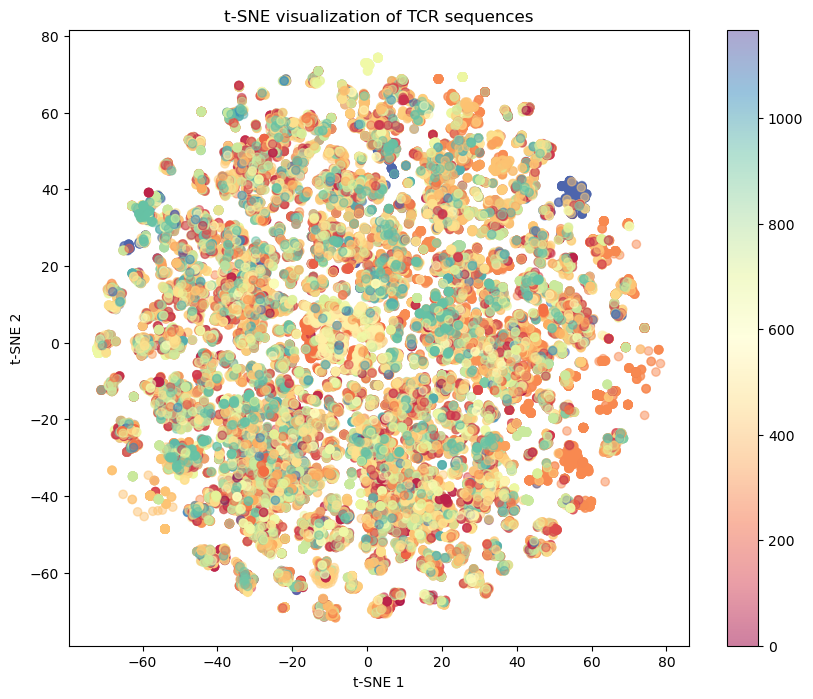

In [10]:
from sklearn.manifold import TSNE

# Assuming `tcr_list` is your input data after PCA reduction to 100 dimensions
# Convert your list to a numpy array if it's not already
tcr_array = np.array(tcr_list)

# Initialize t-SNE with 2 components (2 dimensions)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

# Perform the t-SNE reduction
tsne_results = tsne.fit_transform(tcr_array)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=antigen_label, cmap='Spectral', alpha=0.5)
plt.colorbar()
plt.title('t-SNE visualization of TCR sequences')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


In [14]:
############TSNE##########
tcr_array = np.array(tcr_list)
tsne = manifold.TSNE(n_components=2, init='pca', learning_rate=100)
reduced_data = tsne.fit_transform(tcr_array)

### DBSCAN algorithm with min_samples=10 was selected for clustering

In [17]:
from sklearn.cluster import DBSCAN

dbscan_tsne = DBSCAN(eps=0.5, min_samples=20)
dbscan_tsne_labels = dbscan_tsne.fit_predict(reduced_data)

unique_tsne_labels = np.unique(dbscan_tsne_labels)
print(f"Unique labels found: {unique_tsne_labels}")

Unique labels found: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 2

### Visualization of Clusters

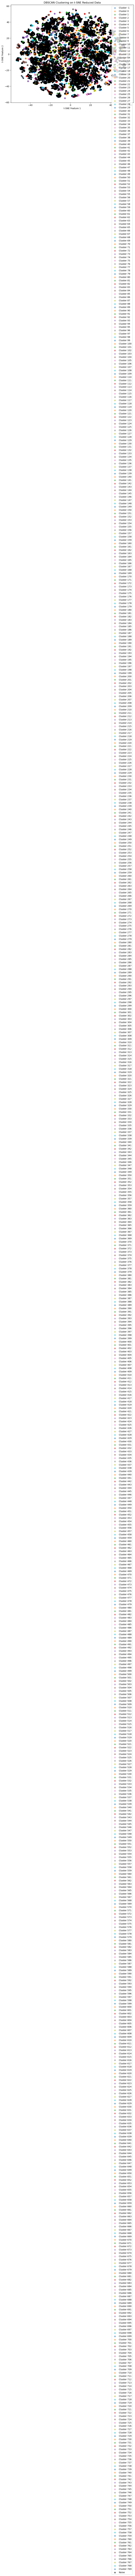

In [18]:
plt.figure(figsize=(10, 8))
for label in unique_tsne_labels:
    # Filter points belonging to the current label
    label_points = reduced_data[dbscan_tsne_labels == label]
    plt.scatter(label_points[:, 0], label_points[:, 1], label=f'Cluster {label}', alpha=0.5)

# Mark noise points
noise_points = reduced_data[dbscan_tsne_labels == -1]
plt.scatter(noise_points[:, 0], noise_points[:, 1], color='black', label='Noise', alpha=0.5)

plt.title('DBSCAN Clustering on t-SNE Reduced Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

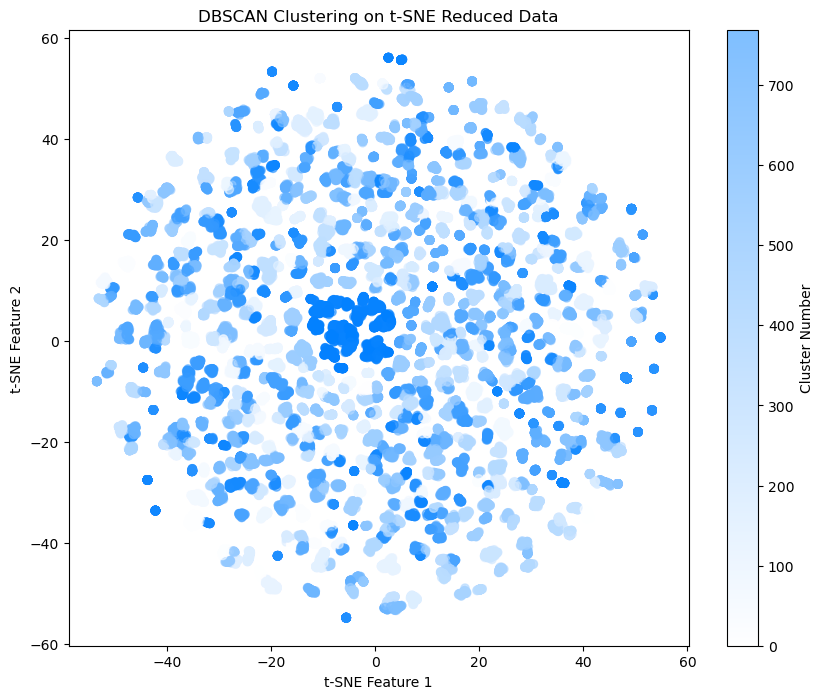

In [22]:
from matplotlib.colors import LinearSegmentedColormap

# 创建一个从浅到深的颜色映射
colors = [(1, 1, 1), (0, 0.5, 1)]  # 这里定义了从白色到蓝色的渐变
n_bins = len(unique_tsne_labels) - 1  # 不包括噪音点
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 绘制散点图，为每个群集分配颜色映射中的一个颜色
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[dbscan_tsne_labels != -1, 0],
                      reduced_data[dbscan_tsne_labels != -1, 1],
                      c=dbscan_tsne_labels[dbscan_tsne_labels != -1],
                      cmap=cm, alpha=0.5)

# 创建颜色条
colorbar = plt.colorbar(scatter, spacing='proportional')
colorbar.set_label('Cluster Number')
plt.title('DBSCAN Clustering on t-SNE Reduced Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

# Filter out noise points before calculating the silhouette score
filtered_labels = dbscan_tsne_labels[dbscan_tsne_labels != -1]
filtered_data = reduced_data[dbscan_tsne_labels != -1]

if len(np.unique(filtered_labels)) > 1:  # Ensure there's more than one cluster
    score = silhouette_score(filtered_data, filtered_labels)
    print(f'Silhouette Score: {score}')
else:
    print('Silhouette score cannot be calculated for a single cluster.')


Silhouette Score: 0.72052401304245


### Logistic Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = tcr_list
y = antigen_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)  # max_iter 可能需要调整
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.6577217227961895
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         4
           3       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.67      1.00      0.80         2
          20       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         

/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = tcr_list 
y = antigen_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.7272910237488259
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       1.00      1.00      1.00         2
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         

/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julio/anaconda

### SVC

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = tcr_list
y = antigen_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='rbf', C=1, gamma='auto')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.5605125452837784
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         

/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/julio/anaconda

### GBDT 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = tcr_list 
y = antigen_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbdt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbdt_model.fit(X_train, y_train)

y_pred = gbdt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
